# Image quilting

In this tutorial, we demonstrate the use of the image quilting solver in GeoStats.jl. Image quilting is the fastest multiple-point simulation solver in the literature. For more information about the algorithm and its performance, please watch the following video:

In [1]:
using IJulia

HTML("<iframe width=\"560\" height=\"315\" src=\"https://www.youtube.com/embed/YJs7jl_Y9yM?rel=0&amp;controls=0&amp;showinfo=0\" frameborder=\"0\" allowfullscreen></iframe>")

HTML{String}("<iframe width=\"560\" height=\"315\" src=\"https://www.youtube.com/embed/YJs7jl_Y9yM?rel=0&amp;controls=0&amp;showinfo=0\" frameborder=\"0\" allowfullscreen></iframe>")

Before we proceed, please install the following packages:

In [2]:
for pkg in ["GeoStats", "ImageQuilting", "GeoStatsImages", "Plots", "PyPlot"]
    Pkg.add(pkg)
end

INFO: Package GeoStats is already installed
INFO: Package ImageQuilting is already installed
INFO: Package GeoStatsImages is already installed
INFO: Package Plots is already installed
INFO: Package PyPlot is already installed


## Problem definition

### Conditional simulation

In [3]:
using GeoStats

# create some artificial data
data = DataFrames.DataFrame(x=[50.,190.,150.,150.], y=[50.,50.,170.,190.], facies=[1,0,1,1])

geodata = GeoDataFrame(data, [:x,:y])
domain  = RegularGrid{Float64}(250, 250)
condsim = SimulationProblem(geodata, domain, :facies, 3)

2D SimulationProblem (conditional)
  data:      4×3 GeoDataFrame (x and y)
  domain:    250×250 RegularGrid{Float64,2}
  variables: facies (Int64)
  N° reals:  3

### Unconditional simulation

In [4]:
uncondsim = SimulationProblem(domain, :facies => Float64, 3)

2D SimulationProblem (unconditional)
  data:      nothing
  domain:    250×250 RegularGrid{Float64,2}
  variables: facies (Float64)
  N° reals:  3

## Solving the problem

Like most other multiple-point simulation solvers, image quilting is parametrized with a training image. The [GeoStatsImages.jl](https://github.com/juliohm/GeoStatsImages.jl) package provides various training images from the literature for fast experimentation in Julia. **Please give credit to the data sources if you use these images in your research**.

We load a famous image from the geostatistics literature:

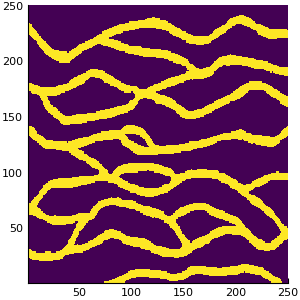

In [5]:
using GeoStatsImages
using Plots; pyplot()

TI = training_image("Strebelle")

heatmap(TI[:,:,1]', c=:viridis, cbar=false, size=(300,300))

and define our solver:

In [6]:
using ImageQuilting

solver = ImgQuilt(:facies => @NT(TI=TI, template=(30,30,1)));

The solver can be used for unconditional simulation:

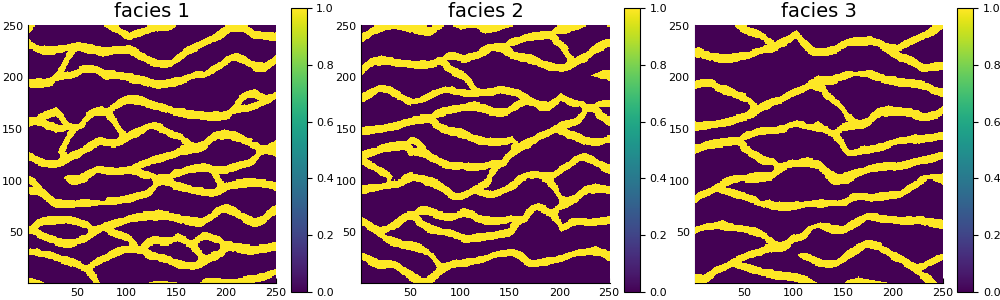

In [7]:
solution = solve(uncondsim, solver)

plot(solution, color=:viridis, size=(1000,300))

as well as conditional simulation:

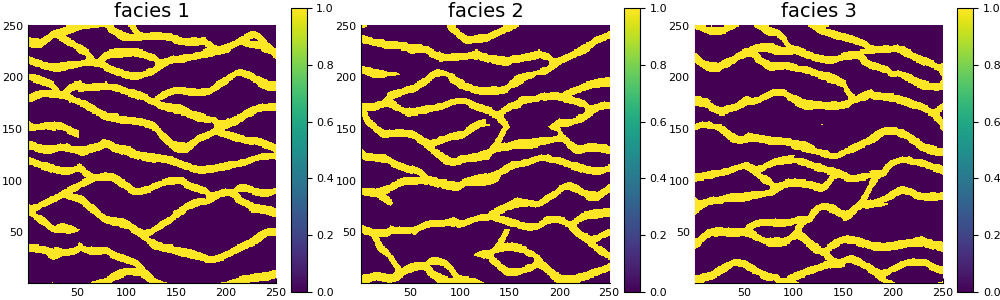

In [8]:
solution = solve(condsim, solver)

plot(solution, color=:viridis, size=(1000,300))